Text(0, 0.5, 'k-th moment')

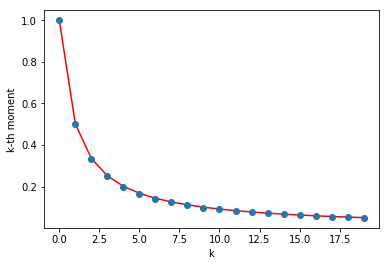

In [1]:
#Use awful IBM Linear congruential random number generator that produces highly correlated random numbers
#does this generate fail?

%matplotlib inline
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

N = 50002
r = np.zeros(N+1)
# This is my arbitrary pick (large, and *probably* primes -- haven't checked)
#bigint = 6537169170218971
#coef = 52361276312121

# This the infamous RANDU
coef = 65539
bigint = 2**31

# Just some bad choice of numbers
#coef = 112
#bigint=2555

seed = 1.
r[0] = seed
for i in range(1,N+1):
    r[i] = (coef*r[i-1])%bigint
        
#r1 = np.zeros(int(N/2))
#r2 = np.zeros(int(N/2))
#for i in range(0,N,2):
#    r1[int(i/2)] = float(r[i])/float(bigint)
#    r2[int(i/2)] = float(r[i+1])/float(bigint)
    
#pyplot.plot(r1,r2,marker='o',linestyle='None');


##### 
#the K-th moment a distribution:

Num=20 
# number of moments     
moment= np.zeros(Num)

for k in range (0,Num):
    for i in range (1,N+1):
        moment[k] += r[i] ** k 
        
        
for k in range (0,Num):
    moment[k]= moment[k] /((bigint** k) * N)
    
moment
#Uniformity: If the numbers are distributed with a uniform probability distribution P(x), 
#then ([random_moment]) must correspond to the moment of  P: ...

moment_P=np.zeros(Num)
for k in range (0,Num):
    moment_P[k] = 1/ (1+k)
    
    
pyplot.plot (range (0,Num), moment,'r-')
pyplot.plot (range (0,Num), moment_P, 'o')   
#pyplot.legend()
pyplot.xlabel('k')
pyplot.ylabel('k-th moment')


### This generator doesn't fail ###



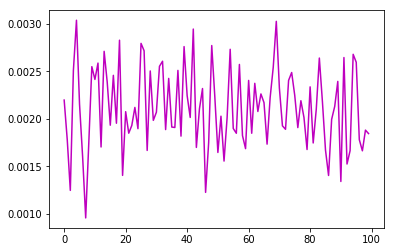

In [3]:
#######
#Autocorrelation: Another simple test determines the near-neighbor correlation in your random sequence by taking the sum of products at a “distance”  m

N = 50002
r = np.zeros(N+1)
# This is my arbitrary pick (large, and *probably* primes -- haven't checked)
#bigint = 6537169170218971
#coef = 52361276312121

# This the infamous RANDU
coef = 65539
bigint = 2**31

# Just some bad choice of numbers
#coef = 112
#bigint=2555

seed = 1.
r[0] = seed
for i in range(1,N+1):
    r[i] = (coef*r[i-1])%bigint
    
for i in range(1,N+1):
    r[i]= float (r[i])/float (bigint)
    
    
Num1=100    
C=np.zeros(Num1)  # Expected C(m)
for l in range(0,Num1):
    for i in range (1,N+1):
        C[l] += r[i] * r[(i+l+1)%N] # % represents modulus. It determines if there is a remainder.

for l in range(0,Num1):
    C[l]=C[l]/N
    
# How much deviation from expected value

Dev= np.zeros(Num1) 
for l in range(0,Num1):
    Dev[l]=C[l]-0.25   #for l>1 then C = 1/4?
pyplot.plot (range (0,Num1), Dev, 'm') 